<a href="https://colab.research.google.com/github/tarunkumarsharma120/imageclassifier/blob/classifeir/image_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [20]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [21]:
y_train=y_train.reshape(-1,)
y_train[:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

In [22]:

def function(X_train,y_train,index):
  classes=['Aeroplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']
  plt.figure(figsize=(5 ,5))
  plt.imshow(X_train[index])
  plt.xlabel(classes[y_train[index]],size=20)

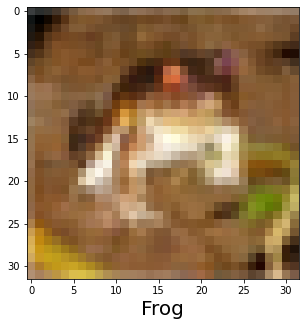

In [23]:
function(X_train,y_train,0)

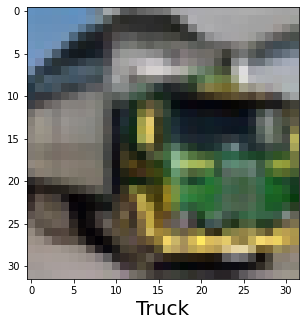

In [24]:
function(X_train,y_train,14)

Normalize the data 

In [25]:
X_train=X_train/255
X_test=X_test/255

In [26]:
X_train[0].shape
# there is input shape of flatten array is 3072 indexes

(32, 32, 3)

In [27]:
len(np.unique(y_train))

10

In [28]:
ANN=models.Sequential([
                      layers.Flatten(input_shape=X_train[0].shape),
                      layers.Dense(2700,activation='relu'),
                      layers.Dense(1000,activation='relu'),
                      layers.Dense(10,activation='sigmoid')
])
ANN.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
ANN.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 144s 92ms/step - loss: 2.1659 - accuracy: 0.2714
Epoch 2/5
1563/1563 [==============================] - 142s 91ms/step - loss: 1.6889 - accuracy: 0.3926
Epoch 3/5
1563/1563 [==============================] - 142s 91ms/step - loss: 1.5943 - accuracy: 0.4252
Epoch 4/5
1563/1563 [==============================] - 141s 91ms/step - loss: 1.5460 - accuracy: 0.4463
Epoch 5/5
1563/1563 [==============================] - 144s 92ms/step - loss: 1.5083 - accuracy: 0.4594


Classfication report
               precision    recall  f1-score   support

           0       0.64      0.42      0.50      1000
           1       0.65      0.49      0.56      1000
           2       0.33      0.43      0.37      1000
           3       0.33      0.25      0.28      1000
           4       0.37      0.38      0.37      1000
           5       0.39      0.34      0.36      1000
           6       0.52      0.46      0.49      1000
           7       0.41      0.63      0.50      1000
           8       0.57      0.65      0.60      1000
           9       0.50      0.53      0.52      1000

    accuracy                           0.46     10000
   macro avg       0.47      0.46      0.46     10000
weighted avg       0.47      0.46      0.46     10000



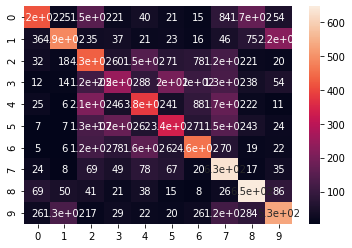

In [30]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred=ANN.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("Classfication report\n",classification_report(y_test,y_pred_classes))
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred_classes),annot=True)

# CNN use

In [44]:
CNN=models.Sequential([
                       #cnn
                      layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=X_train[0].shape),
                      layers.MaxPooling2D((2,2)),
                       
                       layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
                       layers.MaxPooling2D((2,2)),
                       #dense=
                       layers.Flatten(),
                      layers.Dense(64,activation='relu'),
                      layers.Dense(10,activation='softmax')
])
CNN.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
CNN.fit(X_train,y_train,epochs=15)

Epoch 1/15
1563/1563 [==============================] - 58s 37ms/step - loss: 1.7100 - accuracy: 0.3737
Epoch 2/15
1563/1563 [==============================] - 56s 36ms/step - loss: 1.1673 - accuracy: 0.5901
Epoch 3/15
1563/1563 [==============================] - 56s 36ms/step - loss: 1.0044 - accuracy: 0.6517
Epoch 4/15
1563/1563 [==============================] - 55s 35ms/step - loss: 0.9084 - accuracy: 0.6864
Epoch 5/15
1563/1563 [==============================] - 56s 36ms/step - loss: 0.8383 - accuracy: 0.7065
Epoch 6/15
1563/1563 [==============================] - 56s 36ms/step - loss: 0.7933 - accuracy: 0.7217
Epoch 7/15
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7406 - accuracy: 0.7407
Epoch 8/15
1563/1563 [==============================] - 58s 37ms/step - loss: 0.6833 - accuracy: 0.7616
Epoch 9/15
1563/1563 [==============================] - 57s 37ms/step - loss: 0.6580 - accuracy: 0.7738
Epoch 10/15
1563/1563 [==============================] - 57s 36m

Classfication report
               precision    recall  f1-score   support

           0       0.73      0.72      0.73      1000
           1       0.72      0.87      0.79      1000
           2       0.63      0.57      0.60      1000
           3       0.50      0.55      0.52      1000
           4       0.73      0.59      0.65      1000
           5       0.68      0.50      0.58      1000
           6       0.79      0.76      0.77      1000
           7       0.69      0.79      0.74      1000
           8       0.76      0.83      0.79      1000
           9       0.74      0.80      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000



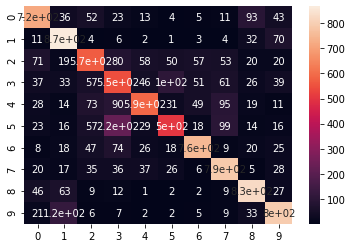

In [45]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred=CNN.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("Classfication report\n",classification_report(y_test,y_pred_classes))
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred_classes),annot=True)

Cat
Ship
Ship
Aeroplane
Deer
Frog
Automobile
Frog
Cat
Automobile


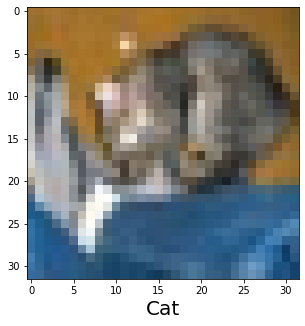

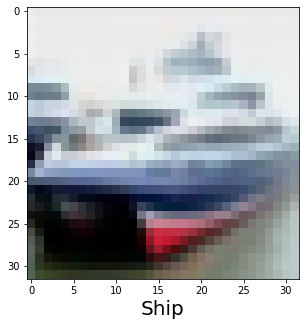

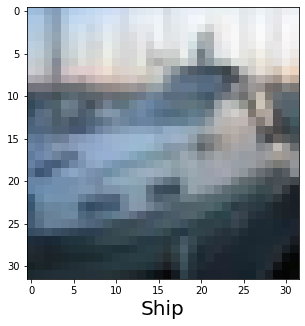

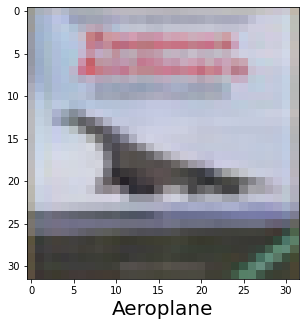

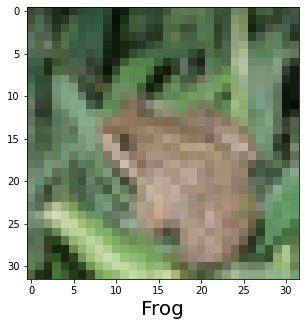

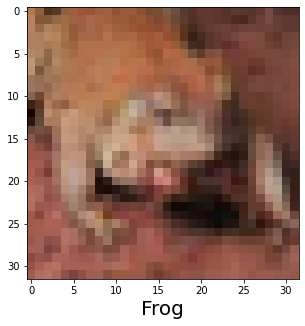

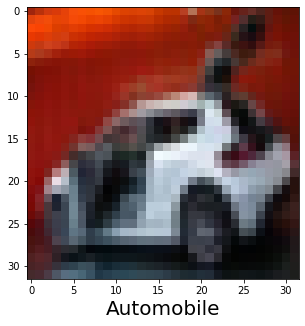

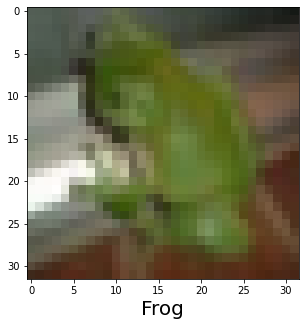

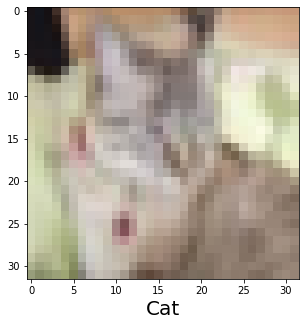

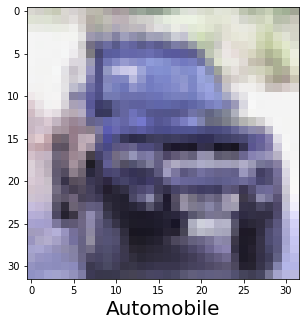

In [46]:
for i in range(10):
  classes=['Aeroplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']
  print(classes[np.argmax(CNN.predict(X_test)[i])])
  function(X_test,y_test.reshape(-1,),i)